In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import scienceplots

plt.style.use(["science", "ieee"])

from matplotlib.pyplot import figure

SAVE = False

if SAVE:
    matplotlib.use("pgf")
    matplotlib.rcParams.update(
        {
            "pgf.texsystem": "pdflatex",
            "font.family": "serif",
            "text.usetex": True,
            "pgf.rcfonts": False,
        }
    )

methods = ["ED", "EST", "RSST", "DSS", "FLA"]

colors = {"EST": "green", "ED": "purple", "RSST": "red", "DSS": "blue", "FLA": "black"}
linestys = {
    "EST": (0, (3, 1, 1, 1, 1, 1)),
    "ED": "dashdot",
    "RSST": "dashed",
    "DSS": "dotted",
    "FLA": "solid",
}
names = {
    "EST": "EST",
    "ED": "ED",
    "RSST": "RSST",
    "DSS": "DSS",
    "FLA": "MTA",
}

parquet_path = "/Users/amos/dev/radar/data/test1m1krsst.parquet"
df = pd.read_parquet(parquet_path)
# raw_df = df.head(100_000)
raw_df = df
df.head()

,method,sample_number,state,n,executed_tasks,normalized_cost,est_ratio,time,loading_rate
0,EST,1,1,10,8,0.235714,1.000000,92000,1.279375
1,ED,1,1,10,8,0.235721,1.000029,66000,1.279375
2,RSST,1,1,10,8,0.031251,0.132579,70767000,1.279375
3,DSS,1,1,10,8,0.031146,0.132136,72235000,1.279375
4,FLA,1,1,10,8,0.031033,0.131654,119000,1.279375


In [2]:
loading_df = raw_df
loading_df["loading_rate"] = loading_df["loading_rate"].apply(lambda x: round(x, 2))
loading_df = (
    loading_df[
        [
            "loading_rate",
            "normalized_cost",
            "executed_tasks",
            "est_ratio",
            "time",
            "method",
        ]
    ]
    .groupby(["method", "loading_rate"])
    .mean(numeric_only=True)
    .reset_index()
)
loading_df.head()

,method,loading_rate,normalized_cost,executed_tasks,est_ratio,time
0,DSS,0.21,0.000125,10.0,0.117030,97673000.0
1,DSS,0.24,0.000170,10.0,0.127599,81246000.0
2,DSS,0.25,0.000060,10.0,0.048331,83204000.0
3,DSS,0.26,0.000100,10.0,0.087629,81743800.0
4,DSS,0.27,0.000114,10.0,0.149987,79949000.0


In [3]:
sdf = raw_df
# scenarios
sdf = (
    sdf[
        [
            "method",
            "state",
            "executed_tasks",
            "normalized_cost",
            "est_ratio",
        ]
    ]
    .groupby(["method", "state"])
    .mean(numeric_only=True)
    .reset_index()
)

sdf = pd.pivot_table(sdf, values="est_ratio", index=["state"], columns=["method"])
sdf = sdf.reset_index()
sdf = sdf[["state", "EST", "ED", "RSST", "DSS", "FLA"]]
print(sdf.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
method &  state &  EST &        ED &      RSST &       DSS &       FLA \\
\midrule
0 &      1 &  1.0 &  1.383152 &  0.276333 &  0.277044 &  0.291802 \\
1 &      2 &  1.0 &  1.238855 &  0.268638 &  0.270034 &  0.281564 \\
2 &      3 &  1.0 &  1.673489 &  0.265851 &  0.266789 &  0.283014 \\
3 &      4 &  1.0 &  1.472476 &  0.260742 &  0.262092 &  0.274062 \\
4 &      5 &  1.0 &  1.186532 &  0.663980 &  0.589393 &  0.692210 \\
5 &      6 &  1.0 &  1.160020 &  0.586405 &  0.600190 &  0.901209 \\
6 &      7 &  1.0 &  1.156686 &  0.576607 &  0.466731 &  0.440923 \\
7 &      8 &  1.0 &  1.194882 &  0.532446 &  0.520023 &  0.684487 \\
\bottomrule
\end{tabular}



/var/folders/_g/mvdjxyln17v1b315lhjlb1vw0000gn/T/ipykernel_95911/4045195640.py:21: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sdf.to_latex())


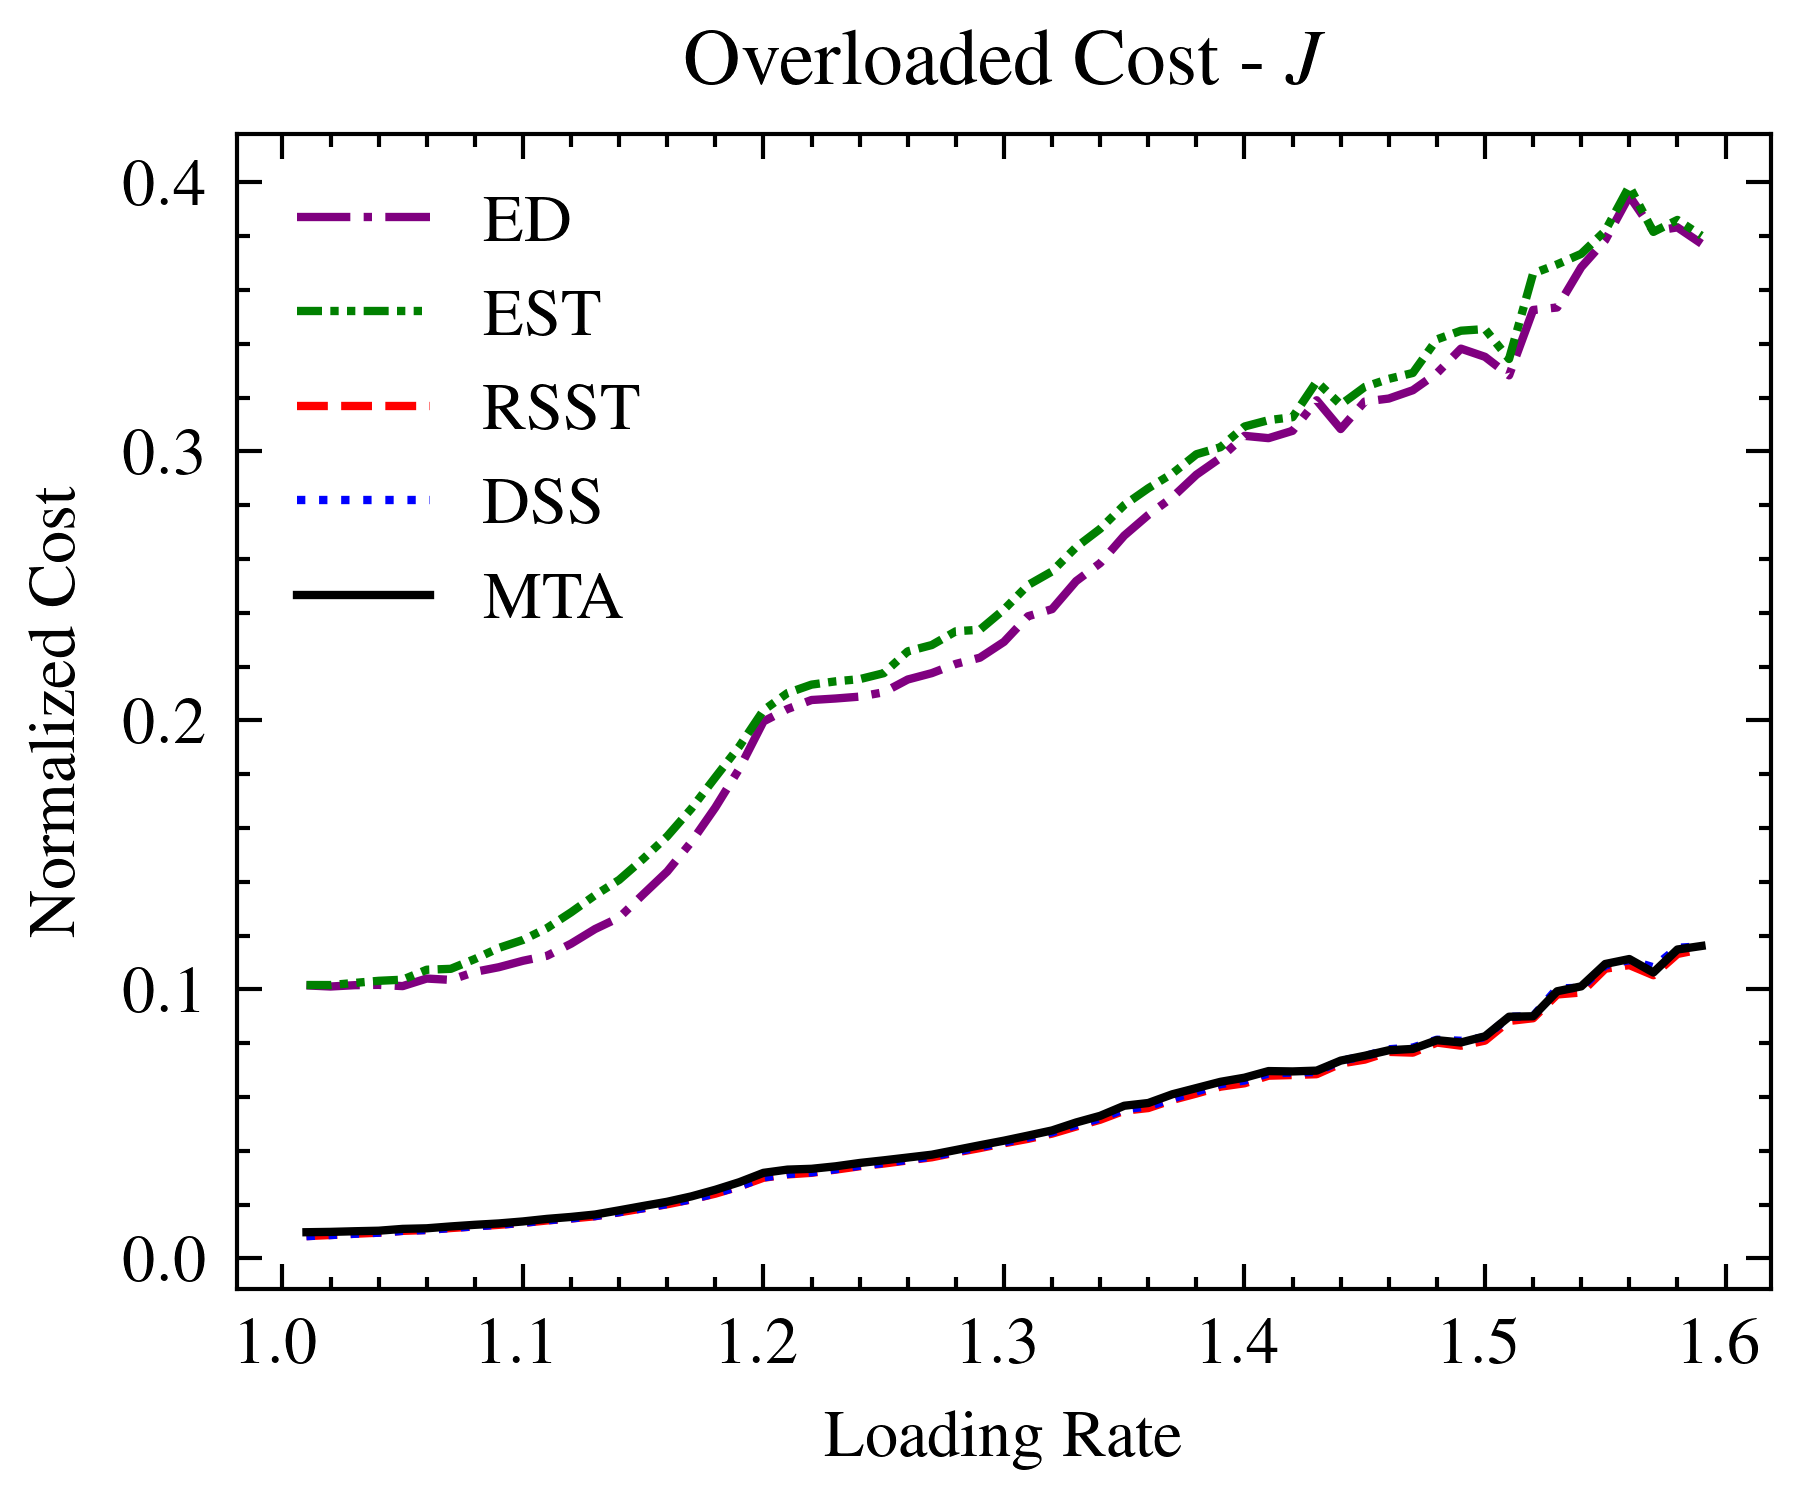

In [4]:
fig, ax = plt.subplots()
ax.margins(0.05)
for method in methods:
    df = loading_df[loading_df["method"] == method]
    df = df[df["loading_rate"] > 1]
    df = df[df["loading_rate"] < 1.6]

    ax.plot(
        df["loading_rate"],
        df["normalized_cost"],
        linestyle=linestys[method],
        c=colors[method],
        label=names[method],
    )
ax.set_title("Overloaded Cost - $J$")
ax.set_ylabel("Normalized Cost")
ax.set_xlabel("Loading Rate")
ax.legend()

if SAVE:
    plt.savefig("./figs/overload5.pgf")

plt.show()

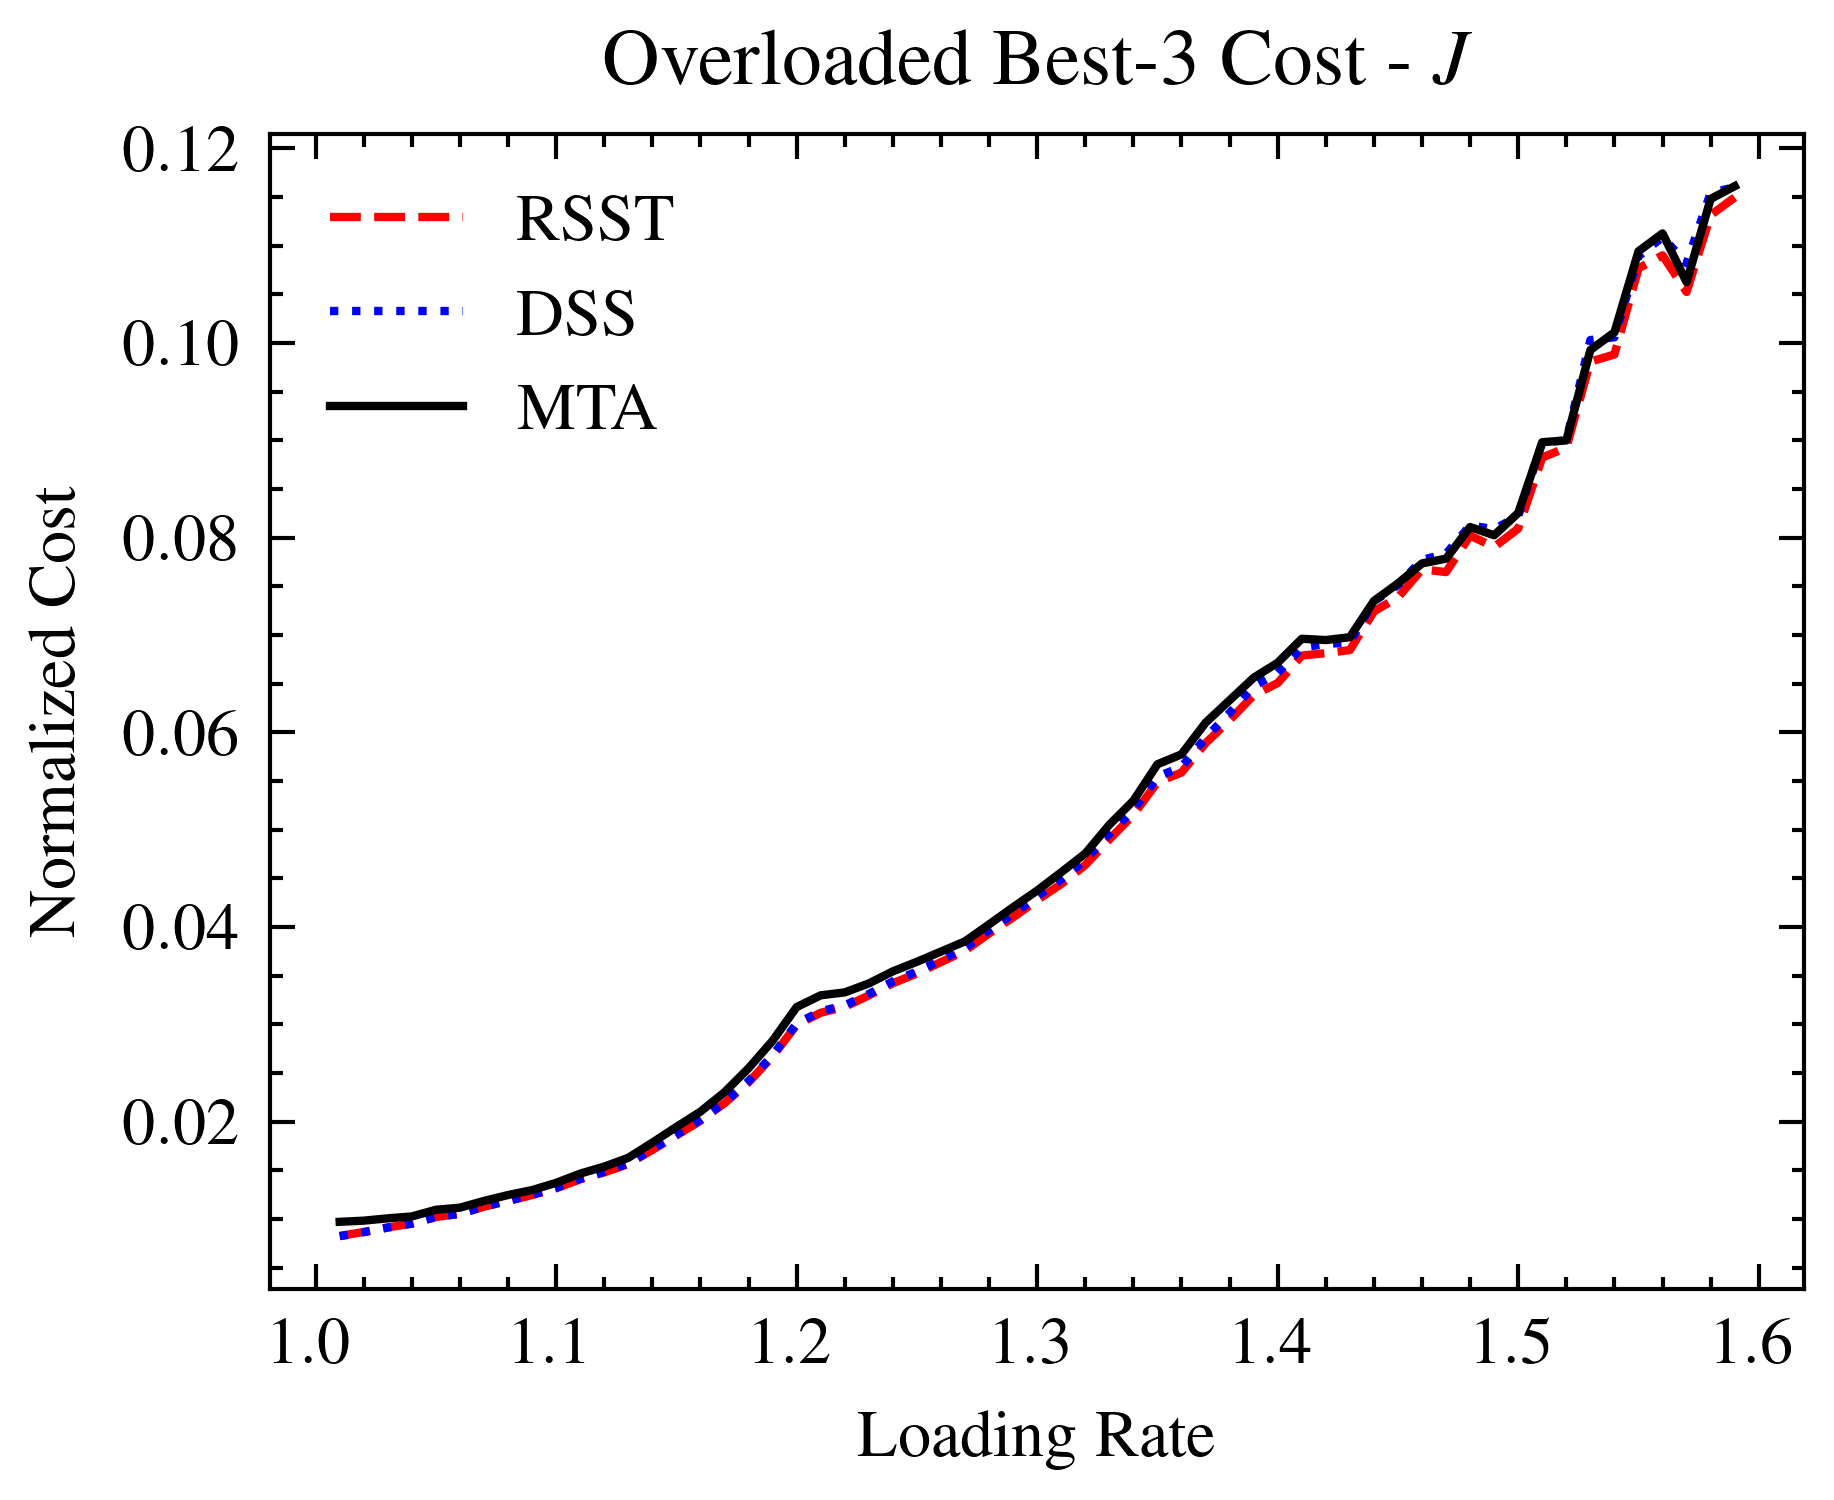

In [5]:
fig, ax = plt.subplots()
ax.margins(0.05)
for method in ["RSST", "DSS", "FLA"]:
    df = loading_df[loading_df["method"] == method]
    df = df[df["loading_rate"] > 1]
    df = df[df["loading_rate"] < 1.6]

    ax.plot(
        df["loading_rate"],
        df["normalized_cost"],
        c=colors[method],
        linestyle=linestys[method],
        label=names[method],
    )
ax.set_title("Overloaded Best-3 Cost - $J$")
ax.set_ylabel("Normalized Cost")
ax.set_xlabel("Loading Rate")
ax.legend()

if SAVE:
    plt.savefig("./figs/overload3.pgf")

plt.show()

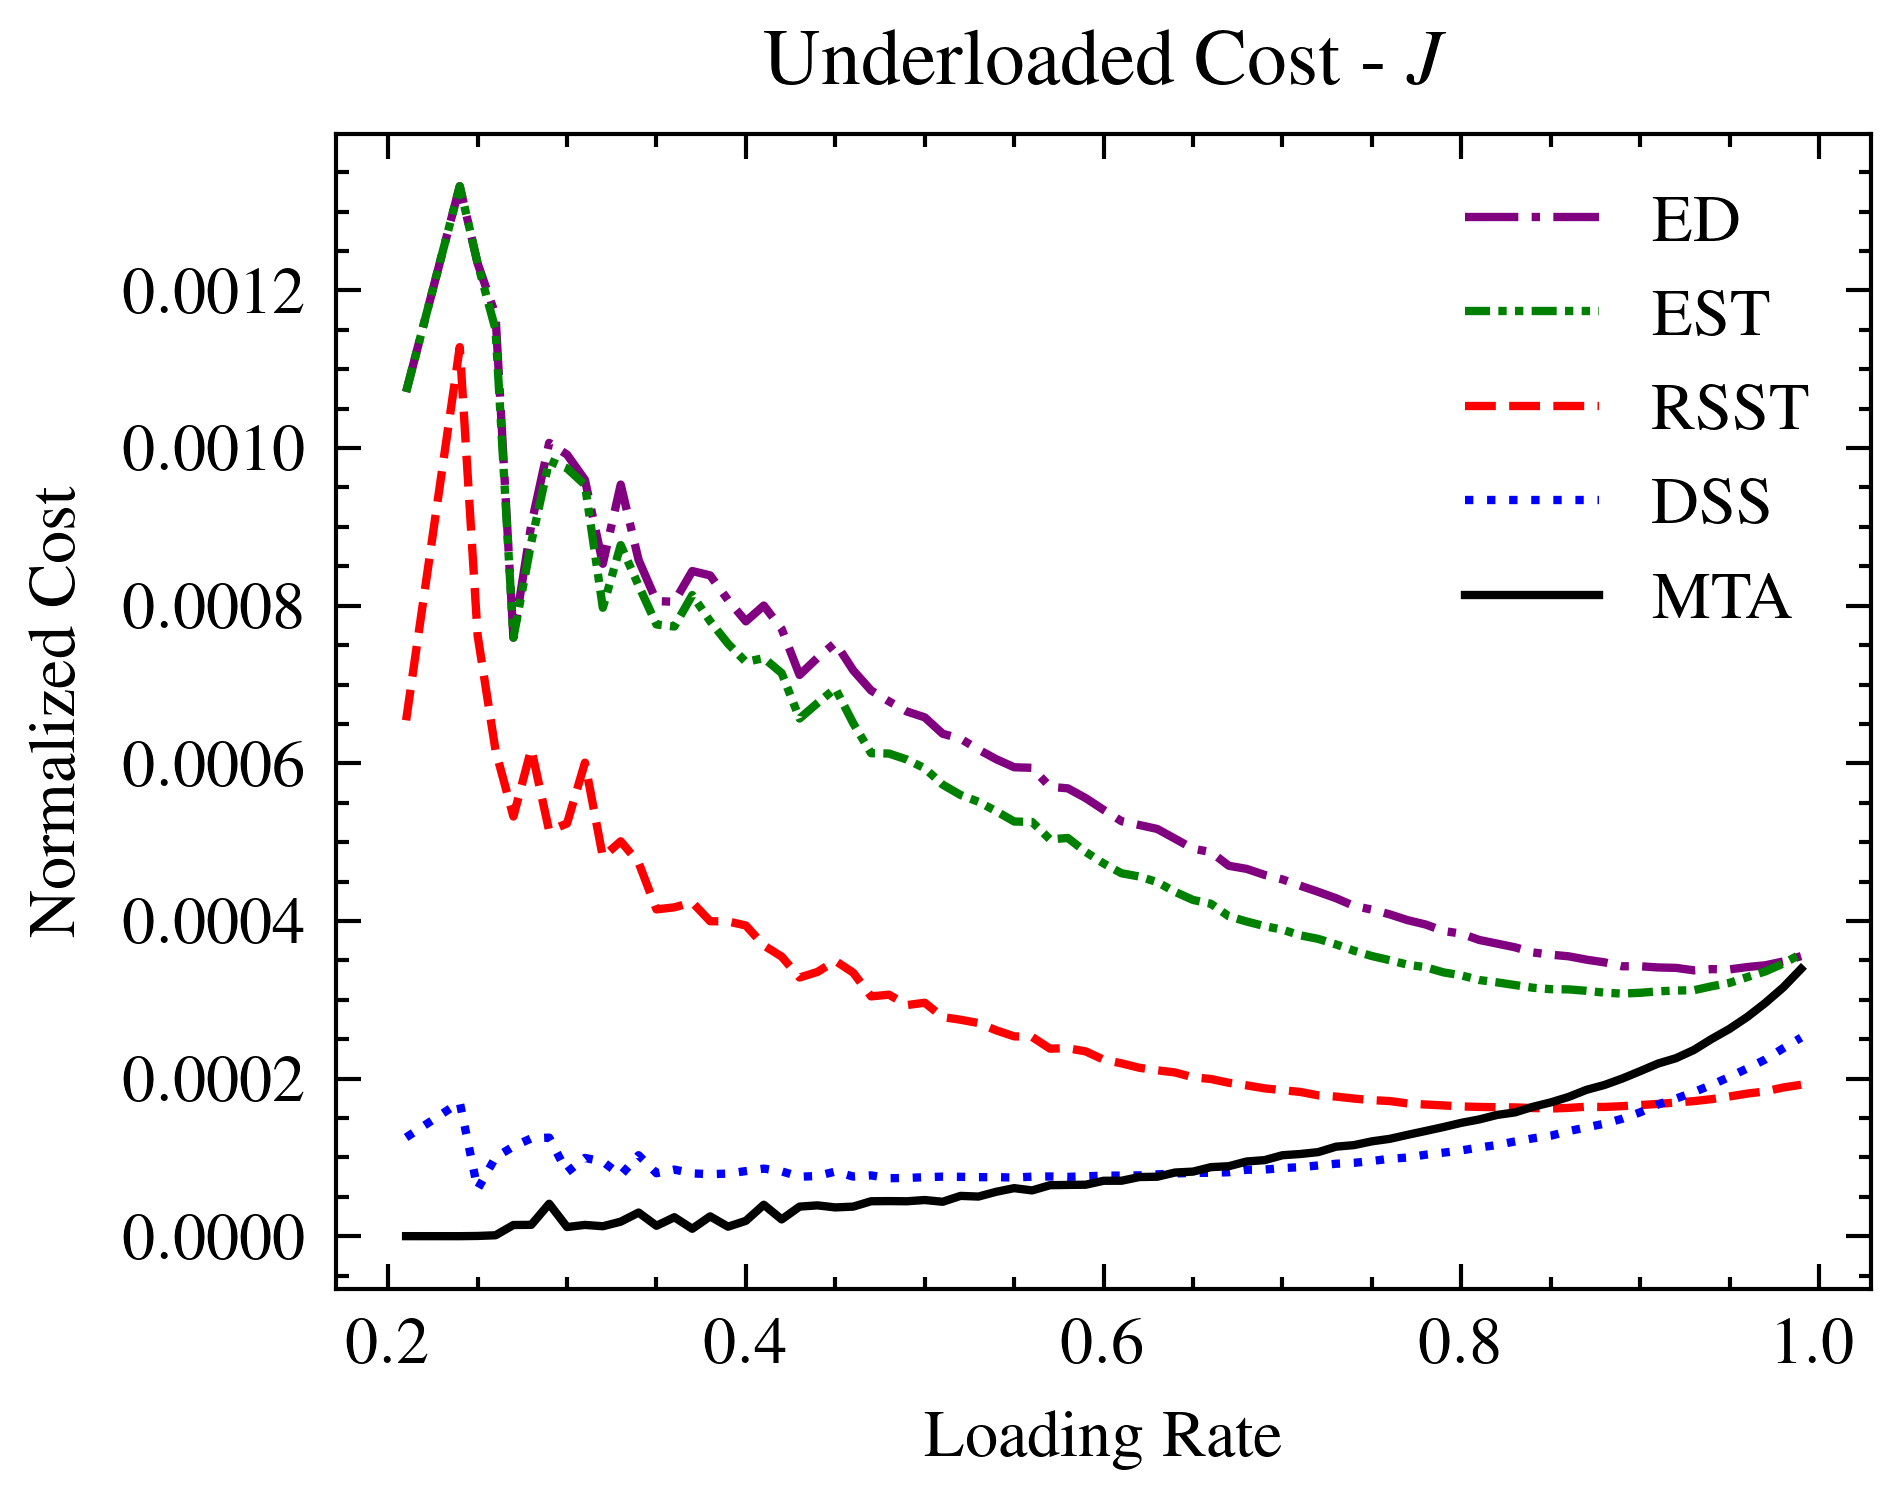

In [6]:
fig, ax = plt.subplots()
ax.margins(0.05)
for method, color in zip(methods, colors):
    df = loading_df[loading_df["method"] == method]

    df = df[df["loading_rate"] < 1]

    ax.plot(
        df["loading_rate"],
        df["normalized_cost"],
        c=colors[method],
        linestyle=linestys[method],
        label=names[method],
    )
ax.set_title("Underloaded Cost - $J$")
ax.set_ylabel("Normalized Cost")
ax.set_xlabel("Loading Rate")
ax.legend()

if SAVE:
    plt.savefig("./figs/underload5.pgf")

plt.show()

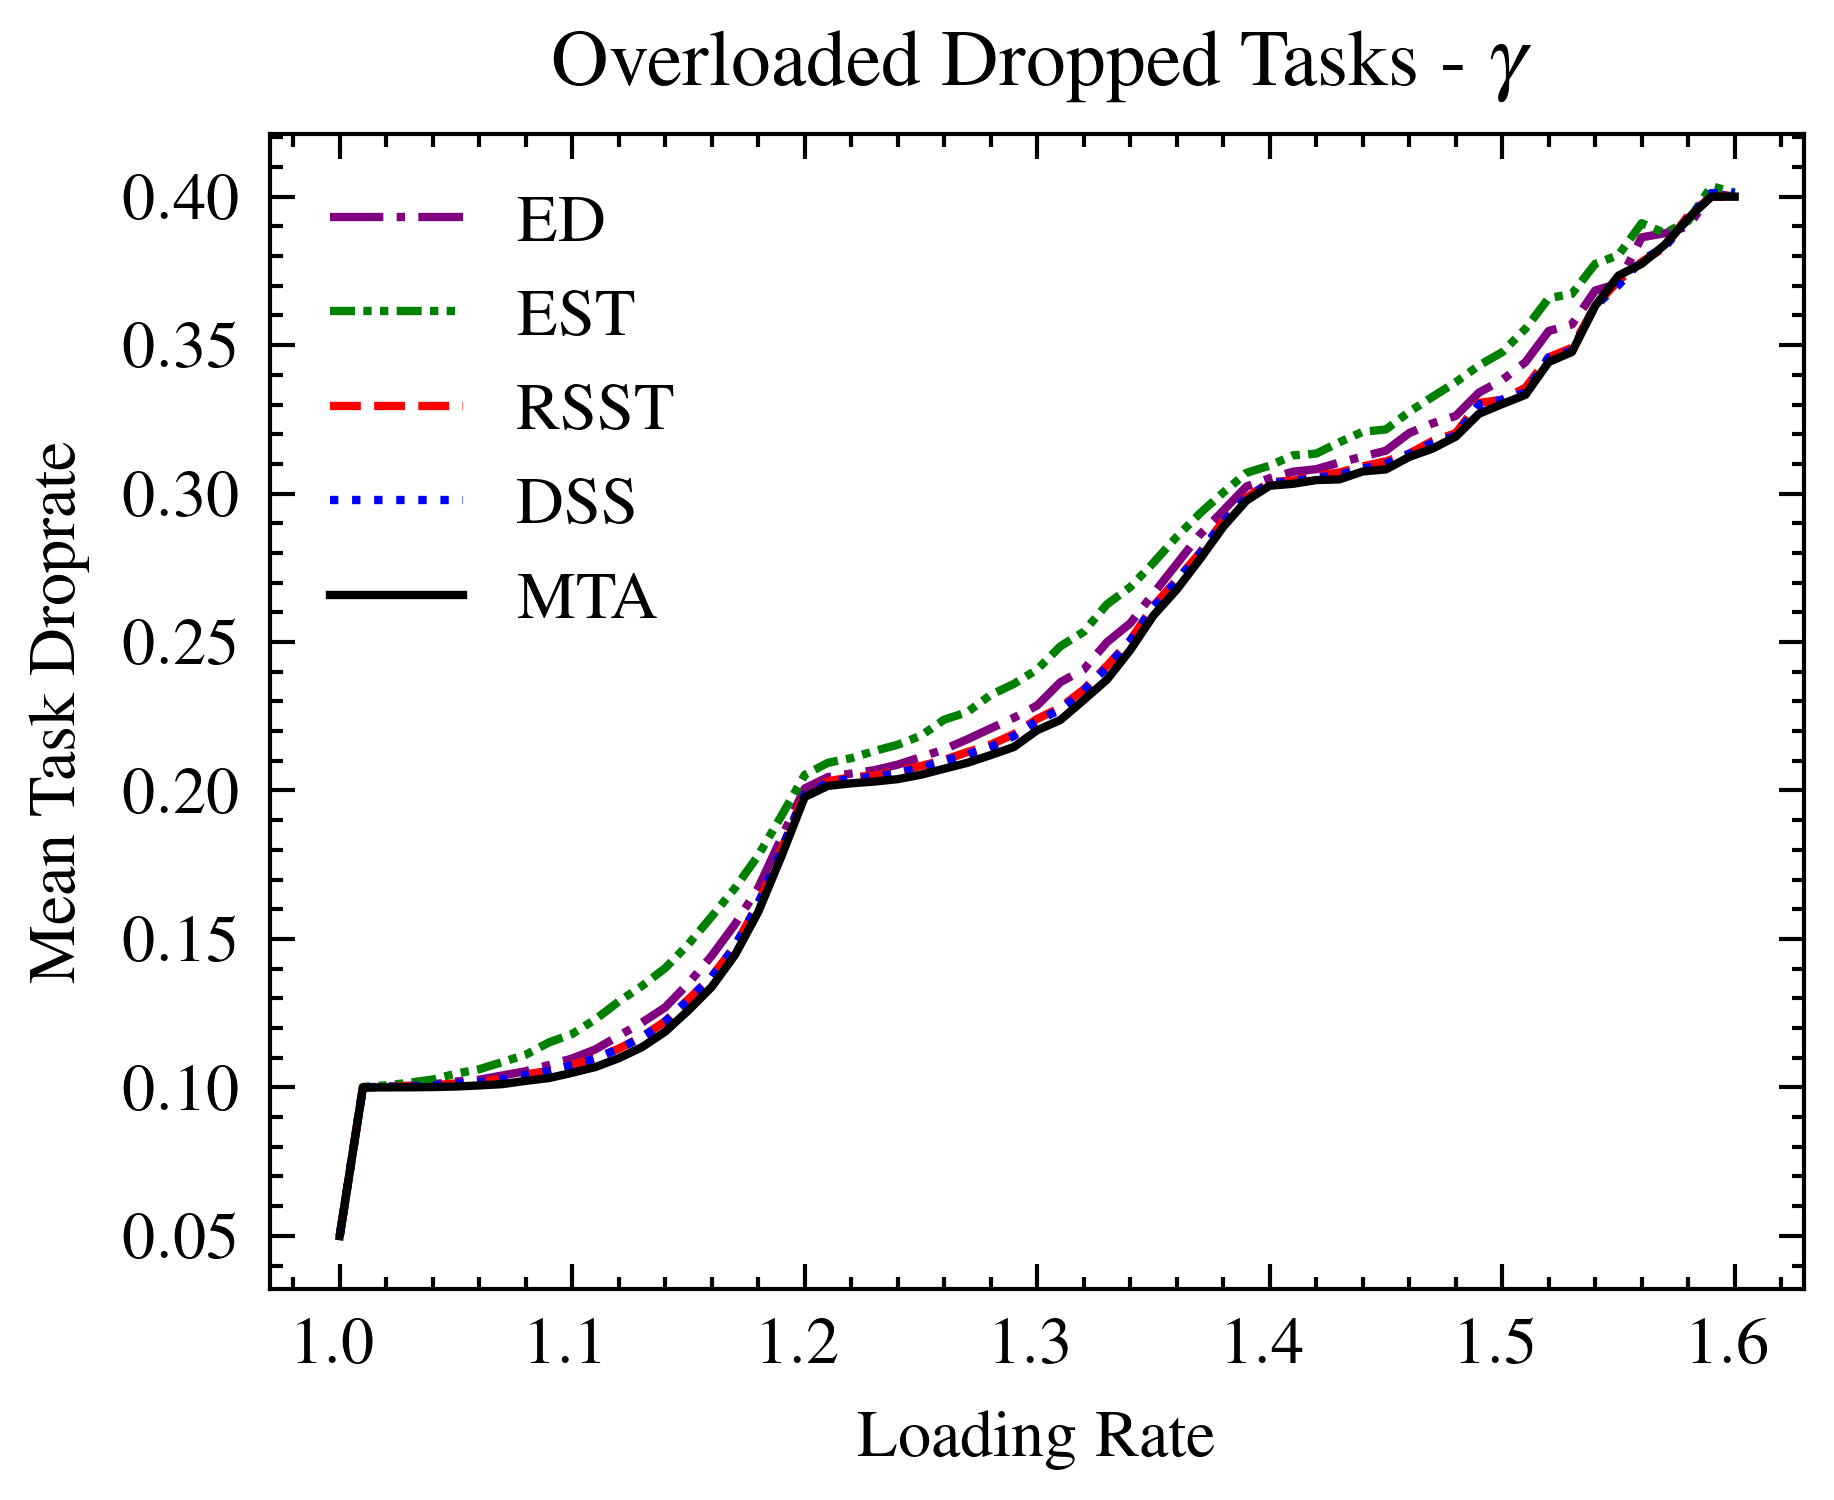

In [7]:
fig, ax = plt.subplots()
ax.margins(0.05)
for method in methods:
    df = loading_df[loading_df["method"] == method]

    df = df[df["loading_rate"] >= 1]
    df = df[df["loading_rate"] <= 1.6]

    ax.plot(
        df["loading_rate"],
        (10 - df["executed_tasks"]) / 10,
        c=colors[method],
        linestyle=linestys[method],
        label=names[method],
    )
ax.set_title("Overloaded Dropped Tasks - $\gamma$")
ax.set_ylabel("Mean Task Droprate")
ax.set_xlabel("Loading Rate")
ax.legend()


if SAVE:
    plt.savefig("./figs/droprate.pgf")


plt.show()

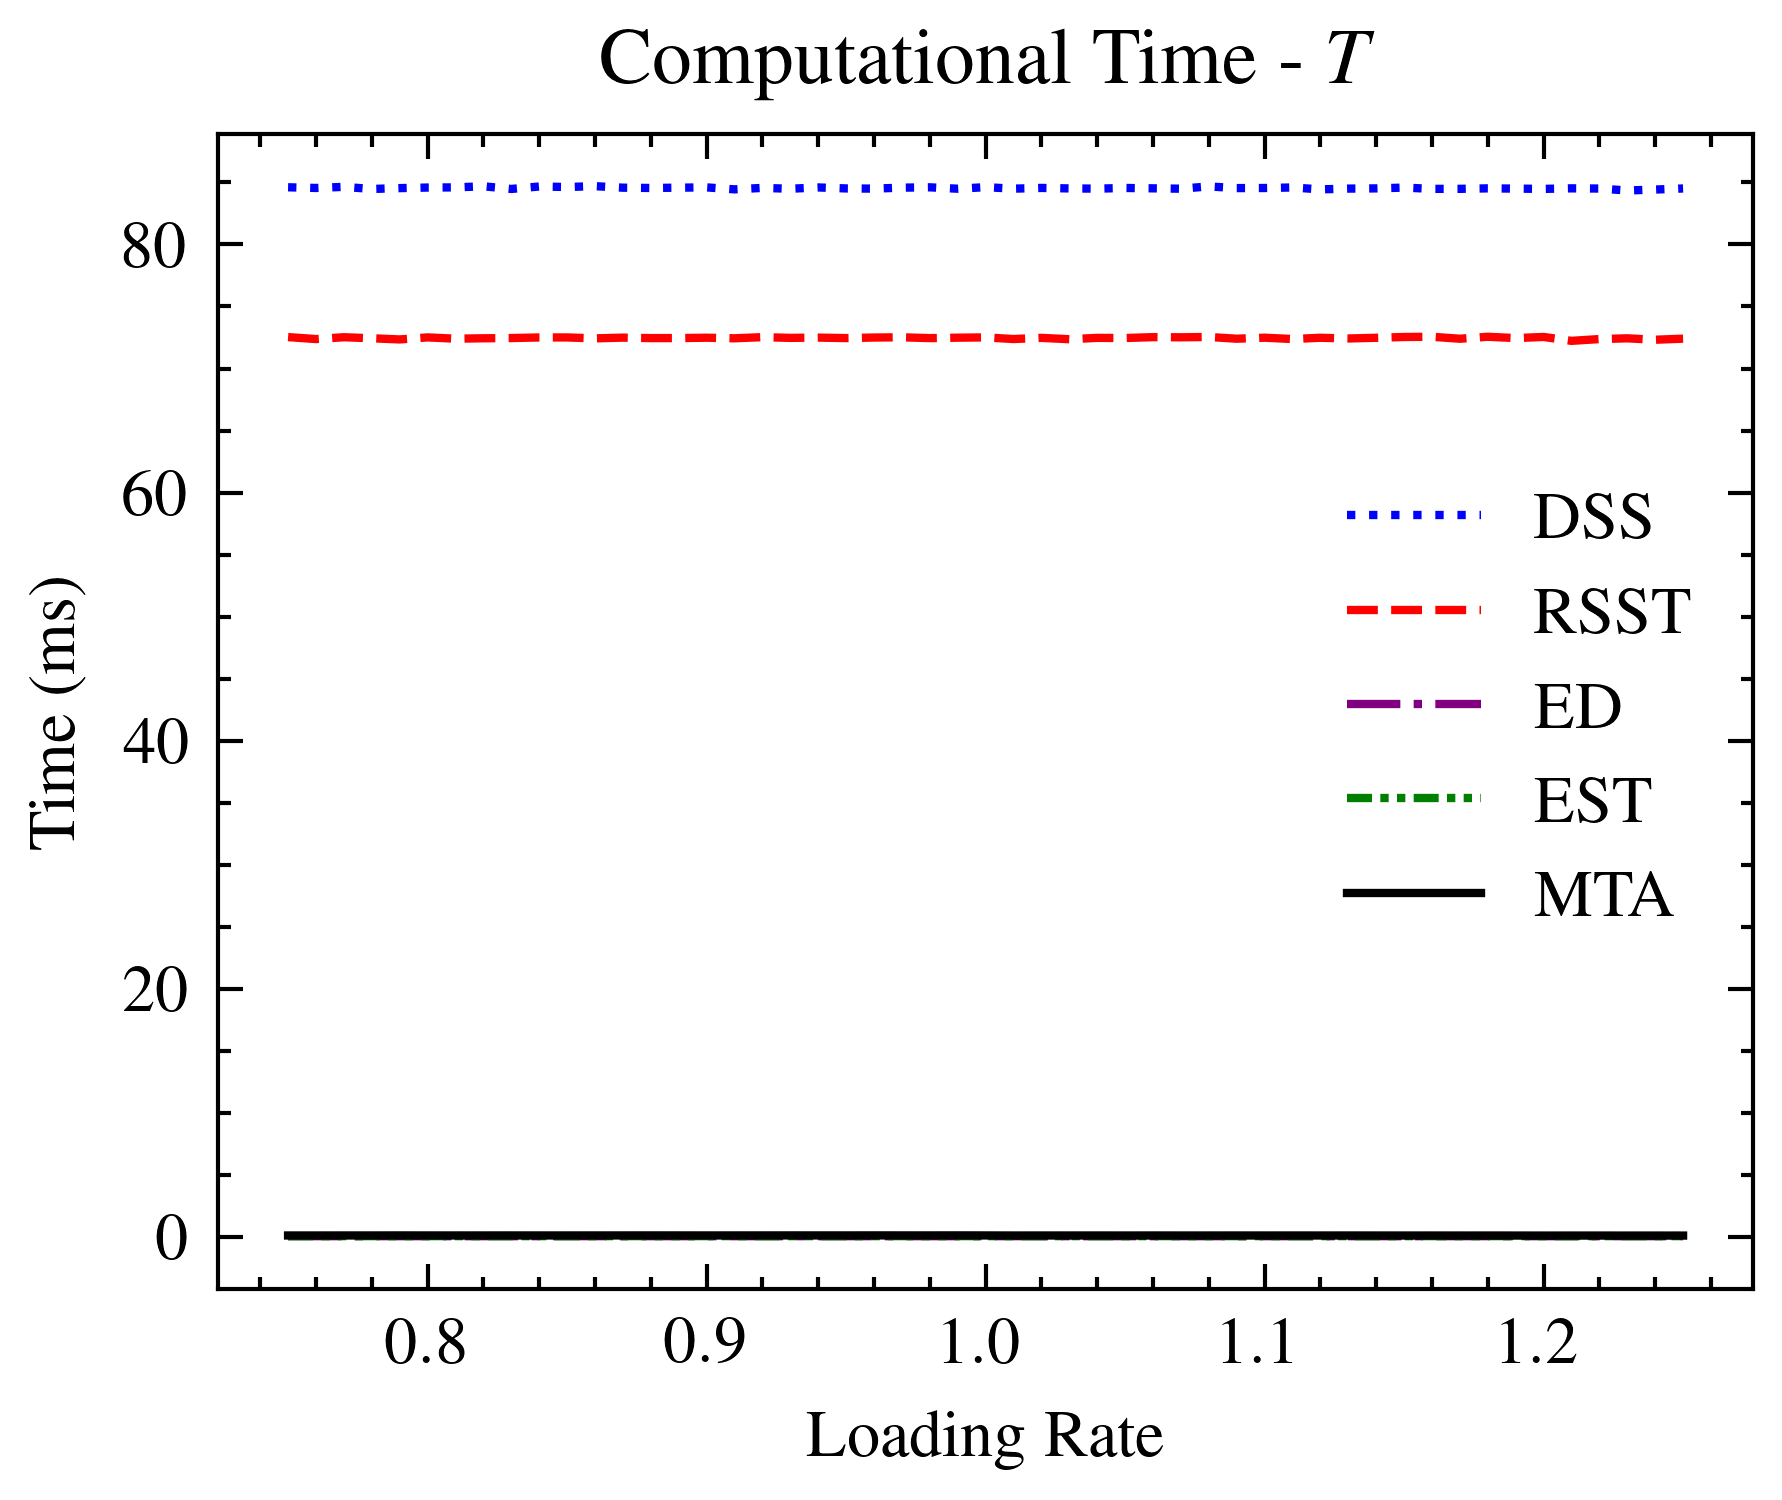

In [8]:
methods = ["DSS", "RSST", "ED", "EST", "FLA"]
fig, ax = plt.subplots()
ax.margins(0.05)
for method in methods:
    df = loading_df[loading_df["method"] == method]

    df = df[df["loading_rate"] >= 0.75]
    df = df[df["loading_rate"] <= 1.25]

    ax.plot(
        df["loading_rate"],
        df["time"] / 1_000_000,
        c=colors[method],
        linestyle=linestys[method],
        label=names[method],
    )
ax.set_title("Computational Time - $T$")
ax.set_ylabel("Time (ms)")
ax.set_xlabel("Loading Rate")
ax.legend()

if SAVE:
    plt.savefig("./figs/comptime5.pgf")

plt.show()

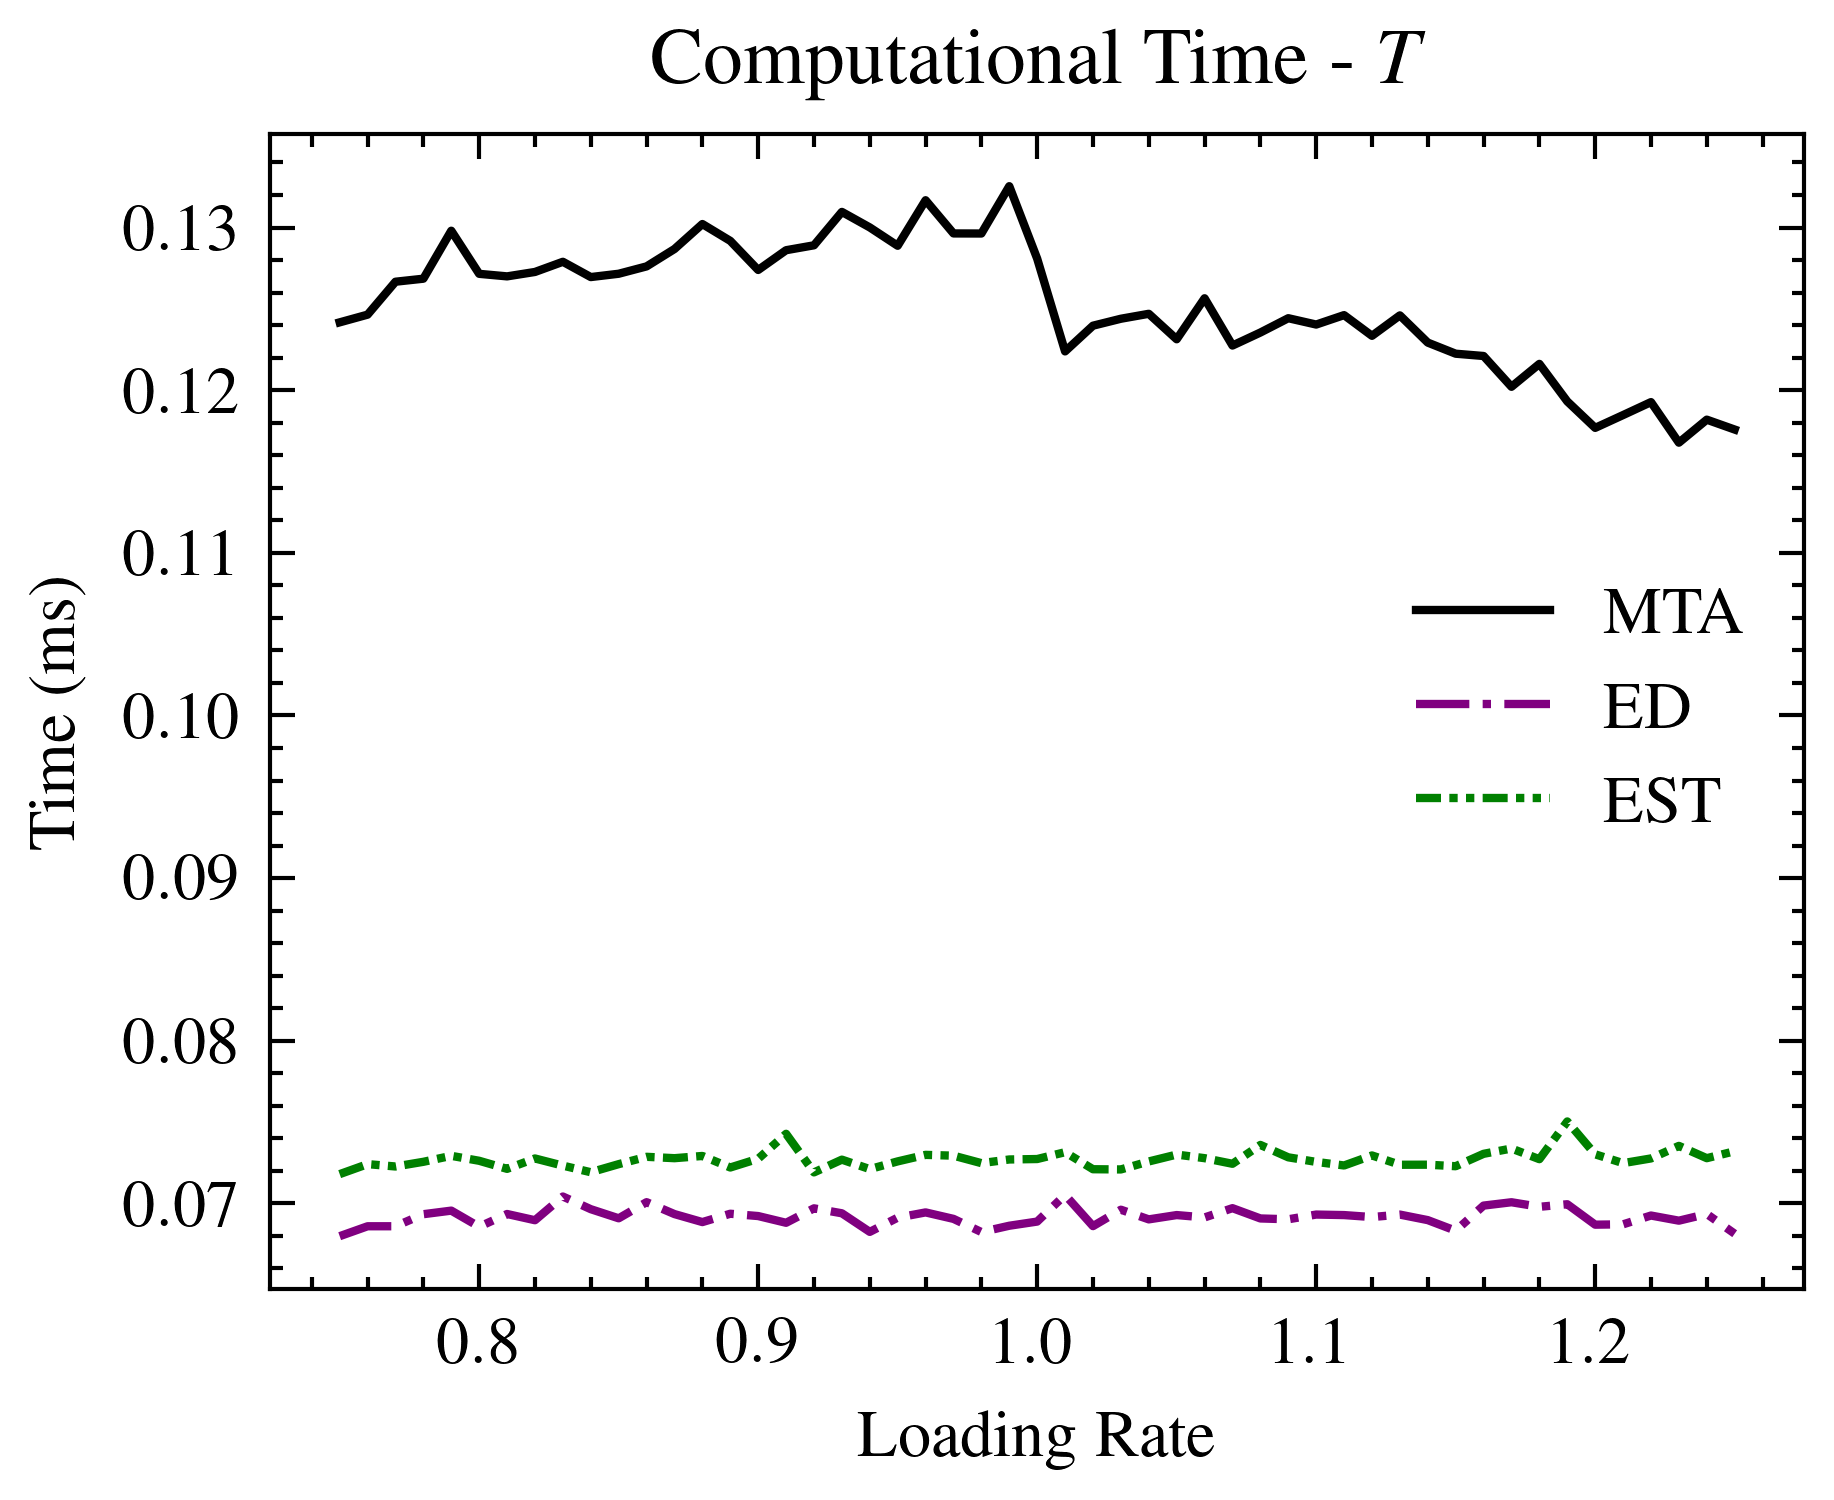

In [9]:
fig, ax = plt.subplots()
ax.margins(0.05)
for method in ["FLA", "ED", "EST"]:
    df = loading_df[loading_df["method"] == method]

    df = df[df["loading_rate"] >= 0.75]
    df = df[df["loading_rate"] <= 1.25]

    ax.plot(
        df["loading_rate"],
        df["time"] / 1_000_000,
        c=colors[method],
        linestyle=linestys[method],
        label=names[method],
    )
ax.set_title("Computational Time - $T$")
ax.set_ylabel("Time (ms)")
ax.set_xlabel("Loading Rate")
ax.legend()

if SAVE:
    plt.savefig("./figs/comptime3.pgf")

plt.show()

In [10]:
parquet_path = "/Users/amos/dev/radar/data/n_task_sweep2.parquet"
one_to_100_task_sweep_df = pd.read_parquet(parquet_path)
df = one_to_100_task_sweep_df

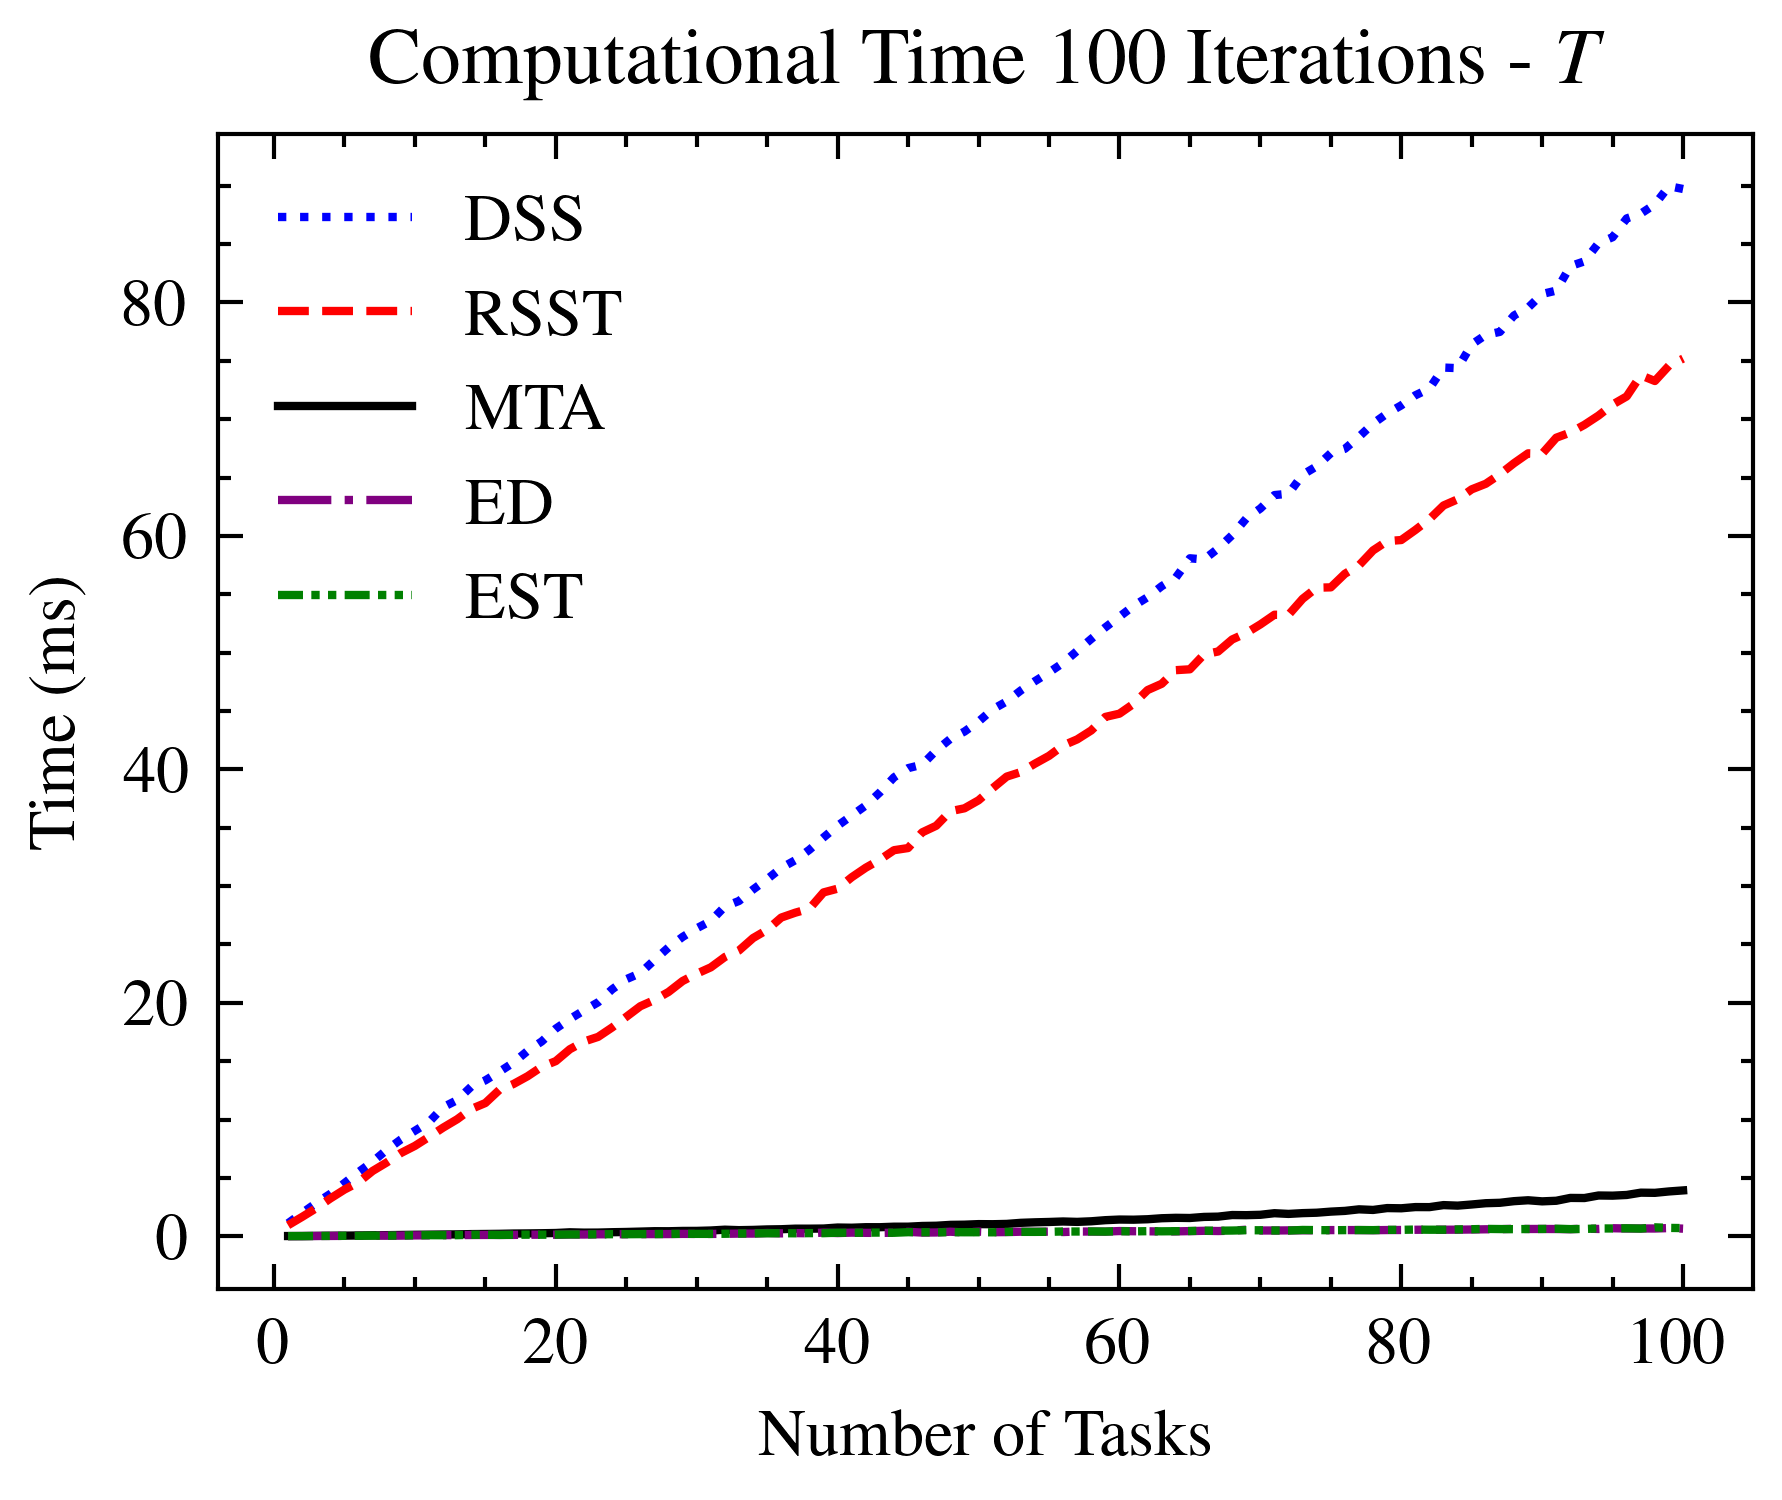

In [11]:
one_to_100_task_sweep_df = (
    one_to_100_task_sweep_df[["n", "time", "method"]]
    .groupby(["method", "n"])
    .mean(numeric_only=True)
    .reset_index()
)

fig, ax = plt.subplots()
ax.margins(0.05)
for method in ["DSS", "RSST", "FLA", "ED", "EST"]:
    df = one_to_100_task_sweep_df[one_to_100_task_sweep_df["method"] == method]

    ax.plot(
        df["n"],
        df["time"] / 1_000_000,
        c=colors[method],
        linestyle=linestys[method],
        label=names[method],
    )
ax.set_title("Computational Time 100 Iterations - $T$")
ax.set_ylabel("Time (ms)")
ax.set_xlabel("Number of Tasks")
ax.legend()

if SAVE:
    plt.savefig("./figs/comptimesweep.pgf")

plt.show()